PRATHEEK K N (PES1UG21CS443) <BR>
PRAVARD M (PES1UG21CS446) <BR>
SHREYAS M N (PES1UG21CS582) <BR>
SYED TANZEEL SHAZ (PES1UG21CS657)<BR>

# Alice's Adventures in Wonderland by Lewis Carroll

novel source link:https://www.gutenberg.org/ebooks/11

## Number of characters: 10
## Number of edges: 18

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import spacy
from collections import defaultdict
from itertools import combinations# !pip install python-louvain
import re
import networkx as nx
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import girvan_newman
import os

# Implimentation

In [37]:
# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

file_path = "alice_adventure.txt"  # Specify the path to your text file
sample_text = read_text_from_file(file_path)


In [45]:
with open('alice_adventure.txt', 'r') as file:
  file_contents = file.read()

In [47]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

preprocessed_text = preprocess_text(file_contents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Alice's Adventures in Wonderland by Lewis Carroll

novel source link:https://www.gutenberg.org/ebooks/11

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(file_contents)
names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print(names)

['Alice', 'Alice', 'Lewis Carroll', 'Arthur DiBianca', 'David Widger', 'Alice’s Adventures', 'Lewis Carroll', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Down', 'Alice', 'Alice', 'Latitude', 'Longitude', 'Down', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice’s', 'Alice', 'Alice', 'Alice', 'Alice', 'Ada', 'Mabel', 'Mabel', 'Alice', 'Mabel', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Latin Grammar', 'Mouse', 'Alice', 'William', 'Alice', 'Mouse', 'Alice', 'Mouse', 'Alice', 'Alice', 'Alice', 'Mouse', 'Mouse', 'Alice', 'Mouse', 'Alice', 'Alice', 'Mouse', 'Mouse', 'Mouse', 'Alice', 'Lory', 'Alice\n', 'Alice', 'Lory', 'Alice', 'Lory', 'Mouse', 'Mouse', 'Mouse', 'William', 'Edwin', 'Mercia', 'Northumbria', 'Lory', 'Mouse', 'Lory', 'Mouse', 'Edwin', 'Mercia', 'Northumbria', 'Mouse', 'Mouse', 'Edgar Atheling'

In [ ]:

main_characters=["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts"]


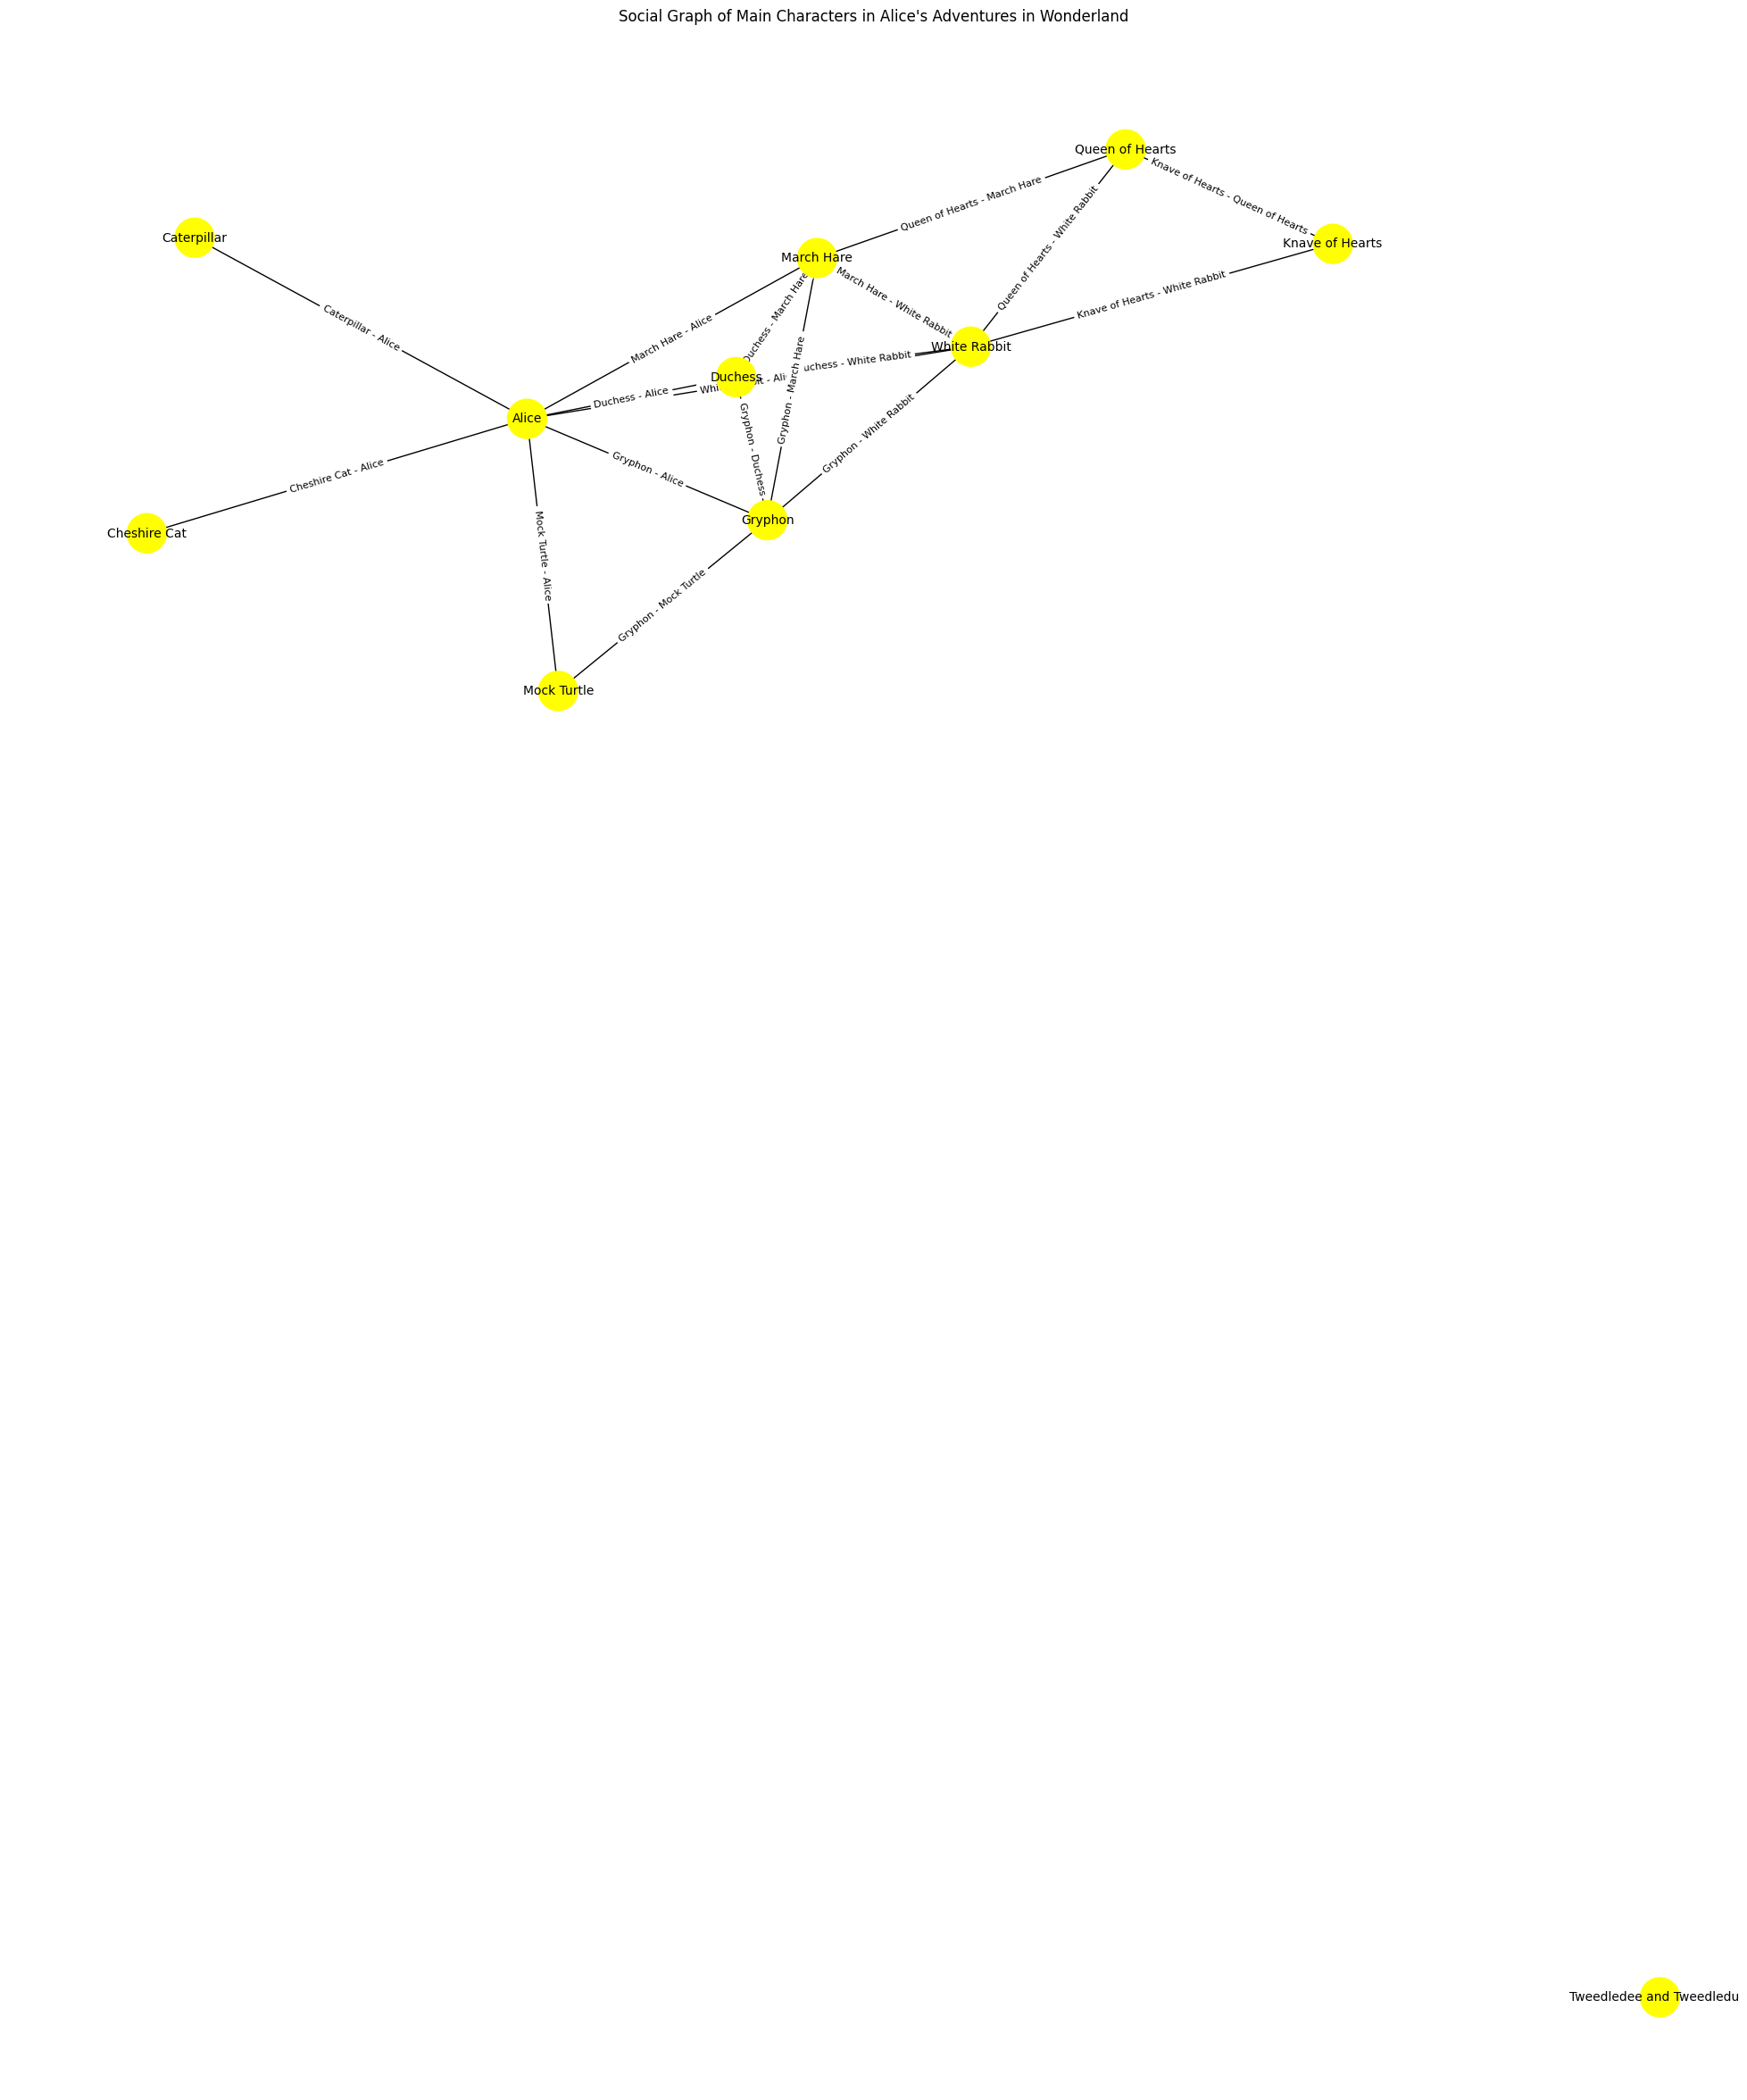

In [ ]:
# Function to preprocess names and find co-occurrences
def extract_co_occurrences(text, characters):
    co_occurrences = {char: set() for char in characters}
    for sentence in re.split(r'[.!?]', text):
        for char in characters:
            if char in sentence:
                for other_char in characters:
                    if other_char != char and other_char in sentence:
                        co_occurrences[char].add(other_char)
    return co_occurrences

# Extract co-occurrences for main characters
co_occurrences = extract_co_occurrences(sample_text, main_characters)

# Create a graph
G = nx.Graph()

temp_edges = []
for i  in range(10):
  if(i%2 == 0):
    temp_edges.append(1)

# Add nodes for main characters
G.add_nodes_from(main_characters, color='yellow', label='Main Character')

# Add edges based on co-occurrences
for char, co_chars in co_occurrences.items():
    for co_char in co_chars:
        G.add_edge(char, co_char)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Set seed for reproducibility
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
node_labels = {node: node for node in G.nodes}
edge_labels = {(char, co_char): f"{char} - {co_char}" for char, co_chars in co_occurrences.items() for co_char in co_chars}

plt.figure(figsize=(25, 30))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Social Graph of Main Characters in Alice's Adventures in Wonderland")
plt.axis("off")
plt.show()


In [ ]:
# Generate adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Convert adjacency matrix to a list of edges
edges_list = [(main_characters[char_idx], main_characters[co_char_idx])
              for char_idx, char_list in enumerate(adj_matrix.tolist())
              for co_char_idx, has_edge in enumerate(char_list)
              if has_edge == 1]

# Print adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix)

# Print list of edges
print("\nList of Edges:")
print(edges_list)
print(len(edges_list))


Adjacency Matrix:
[[0 1 1 1 0 1 1 1 1 0 0]
 [1 0 0 1 1 0 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 1 0 0]
 [0 1 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0]
 [1 1 0 1 0 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

List of Edges:
[('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtl

### Part c: Calculate centrality measures
Create the social graph with main characters

In [ ]:

G = nx.Graph()
main_characters=["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts", "Tweedledee and Tweedledum"]


edges = [('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtle', 'Alice'), ('Mock Turtle', 'Gryphon'), ('Duchess', 'Alice'), ('Duchess', 'White Rabbit'), ('Duchess', 'March Hare'), ('Duchess', 'Gryphon'), ('Gryphon', 'Alice'), ('Gryphon', 'White Rabbit'), ('Gryphon', 'March Hare'), ('Gryphon', 'Mock Turtle'), ('Gryphon', 'Duchess'), ('Knave of Hearts', 'White Rabbit'), ('Knave of Hearts', 'Queen of Hearts')]
G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G)

# Print centrality measures for main protagonists
print("Degree Centrality:")
for char, centrality in degree_centrality.items():
    print(f"{char}: {centrality}")

print("\nBetweenness Centrality:")
for char, centrality in betweenness_centrality.items():
    print(f"{char}: {centrality}")

print("\nCloseness Centrality:")
for char, centrality in closeness_centrality.items():
    print(f"{char}: {centrality}")

print("\nPageRank Centrality:")
for char, centrality in pagerank_centrality.items():
    print(f"{char}: {centrality}")

#print(len(edges)) #36 --> no.on edges = 36/2 = 18

Degree Centrality:
Alice: 0.7000000000000001
White Rabbit: 0.6000000000000001
Cheshire Cat: 0.1
March Hare: 0.5
Queen of Hearts: 0.30000000000000004
Caterpillar: 0.1
Mock Turtle: 0.2
Duchess: 0.4
Gryphon: 0.5
Knave of Hearts: 0.2
Tweedledee and Tweedledum: 0.0

Betweenness Centrality:
Alice: 0.3888888888888889
White Rabbit: 0.2111111111111111
Cheshire Cat: 0.0
March Hare: 0.06666666666666667
Queen of Hearts: 0.011111111111111112
Caterpillar: 0.0
Mock Turtle: 0.0
Duchess: 0.0
Gryphon: 0.05555555555555556
Knave of Hearts: 0.0
Tweedledee and Tweedledum: 0.0

Closeness Centrality:
Alice: 0.7363636363636364
White Rabbit: 0.675
Cheshire Cat: 0.4263157894736842
March Hare: 0.6230769230769231
Queen of Hearts: 0.45
Caterpillar: 0.4263157894736842
Mock Turtle: 0.45
Duchess: 0.5785714285714286
Gryphon: 0.6230769230769231
Knave of Hearts: 0.4263157894736842
Tweedledee and Tweedledum: 0.0

PageRank Centrality:
Alice: 0.19235378133935782
White Rabbit: 0.15296020217339673
Cheshire Cat: 0.038135873172


Ego Network of Alice:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


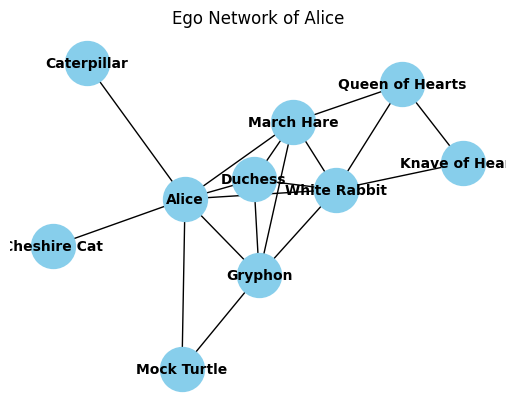


Ego Network of White Rabbit:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


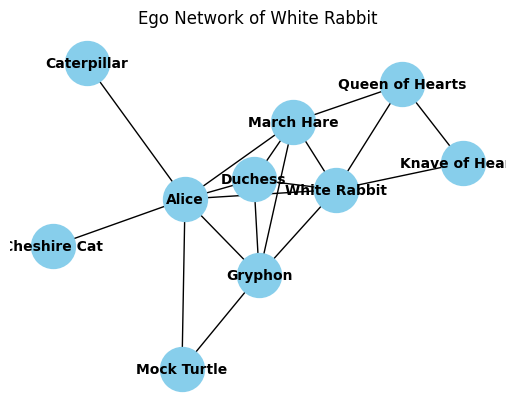


Ego Network of Cheshire Cat:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


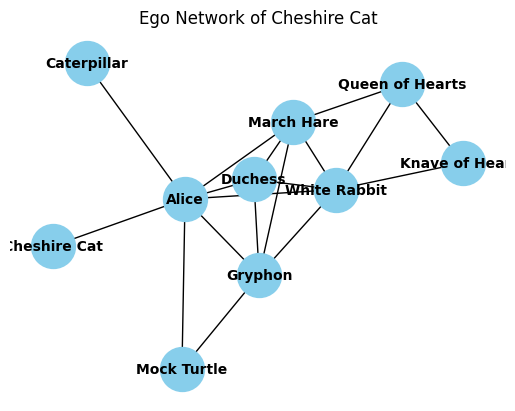


Ego Network of March Hare:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


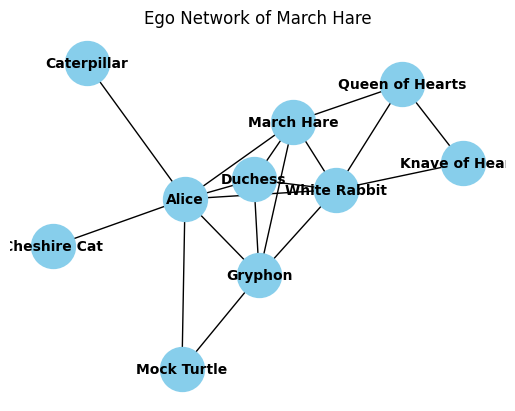


Ego Network of Queen of Hearts:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


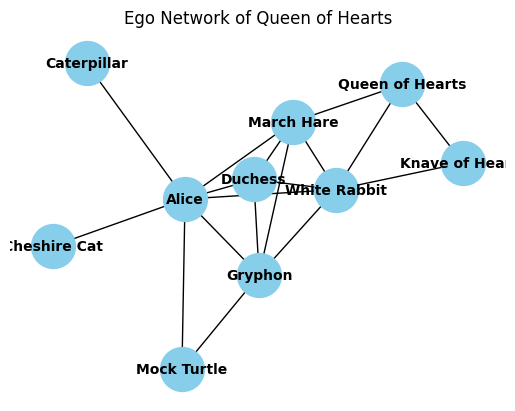


Ego Network of Caterpillar:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


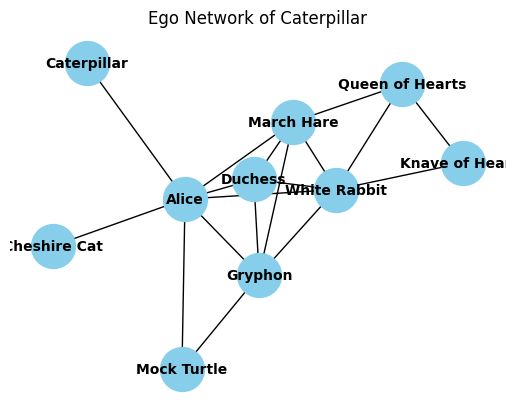


Ego Network of Mock Turtle:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


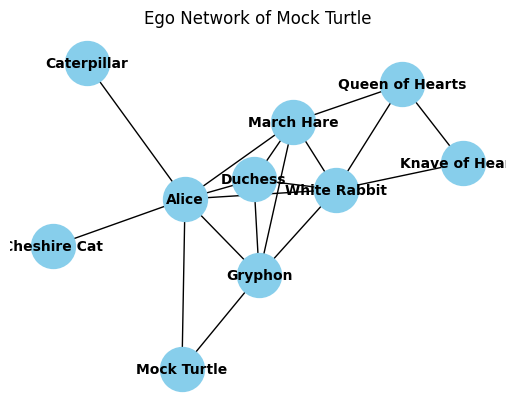


Ego Network of Duchess:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


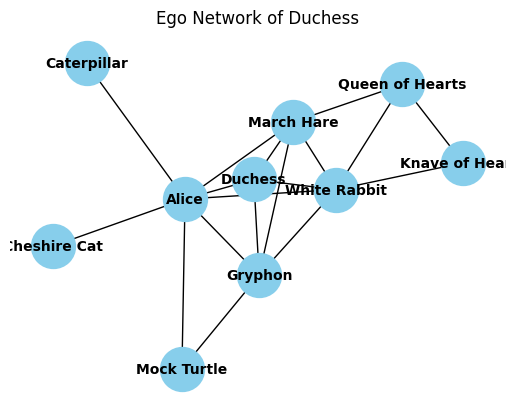


Ego Network of Gryphon:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


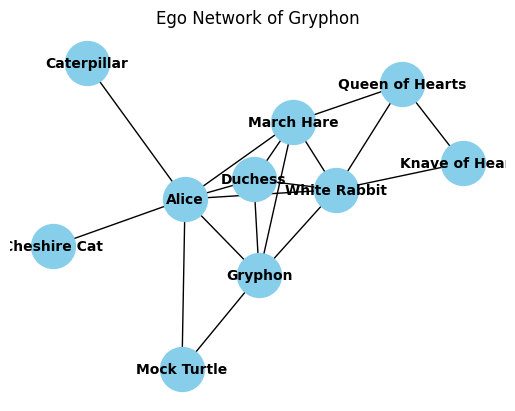


Ego Network of Knave of Hearts:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Queen of Hearts', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon', 'Knave of Hearts']


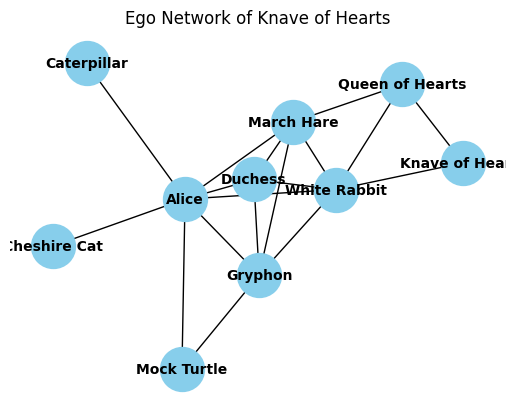


Ego Network of Tweedledee and Tweedledum:
['Tweedledee and Tweedledum']


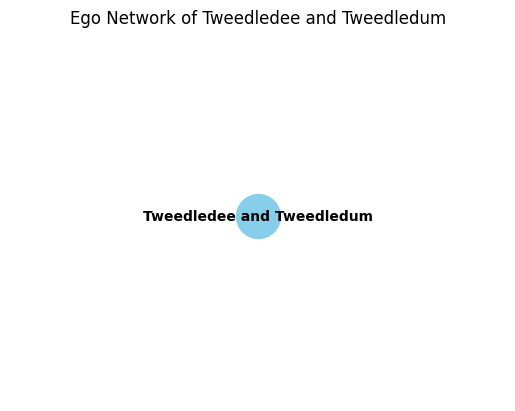

In [ ]:
G = nx.Graph()
main_characters = ["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts", "Tweedledee and Tweedledum"]

edges = [('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtle', 'Alice'), ('Mock Turtle', 'Gryphon'), ('Duchess', 'Alice'), ('Duchess', 'White Rabbit'), ('Duchess', 'March Hare'), ('Duchess', 'Gryphon'), ('Gryphon', 'Alice'), ('Gryphon', 'White Rabbit'), ('Gryphon', 'March Hare'), ('Gryphon', 'Mock Turtle'), ('Gryphon', 'Duchess'), ('Knave of Hearts', 'White Rabbit'), ('Knave of Hearts', 'Queen of Hearts')]
G.add_nodes_from(main_characters)
G.add_edges_from(edges)

for char in main_characters:
    ego_network = G.subgraph(nx.single_source_shortest_path_length(G, char))
    print(f"\nEgo Network of {char}:")
    print(list(ego_network.nodes()))

    # Visualization
    pos = nx.spring_layout(ego_network, seed=42)
    nx.draw_networkx_nodes(ego_network, pos, node_size=1000, node_color='skyblue')
    nx.draw_networkx_labels(ego_network, pos, font_size=10, font_color='black', font_weight='bold')
    nx.draw_networkx_edges(ego_network, pos)
    plt.title(f"Ego Network of {char}")
    plt.axis("off")
    plt.show()

## Part e: Detect communities
### Clique Percolation Method

In [ ]:
# from networkx.algorithms.community import k_clique_communities

G.add_nodes_from(main_characters)
G.add_edges_from(edges)

girvan_newman_communities = list(nx.community.girvan_newman(G))
louvain_communities = list(nx.community.greedy_modularity_communities(G))
clique_percolation = list(nx.community.k_clique_communities(G, 3))

# Print Detected Communitie
print("Girvan-Newman Communities:", girvan_newman_communities)

print("Louvain Communities:", louvain_communities)

print("K-Clique Communities:", clique_percolation)

K-Clique Communities: [frozenset({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'})]
Girvan-Newman Communities: [({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Caterpillar', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Tweedledee and Tweedledum'}), ({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Tweedledee and Tweedledum'}), ({'Mock Turtle', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'}), ({'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Mock Turtle'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'}), ({'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess'}, {'Cheshire Cat'}, 


### Clique Percolation Communities

In [ ]:
print("Clique Percolation Communities:")
for i, community in enumerate(clique_percolation):
    print(f"Community {i + 1}: {community}")

Clique Percolation Communities:
Community 1: frozenset({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'})


###  Girvan Newman Communities

In [ ]:
print("\nGirvan Newman Communities:")
for i, community in enumerate(girvan_newman_communities):
    print(f"Community {i + 1}: {community}")


Girvan Newman Communities:
Community 1: ({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Caterpillar', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Tweedledee and Tweedledum'})
Community 2: ({'Mock Turtle', 'Knave of Hearts', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Tweedledee and Tweedledum'})
Community 3: ({'Mock Turtle', 'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'})
Community 4: ({'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess', 'Queen of Hearts'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Mock Turtle'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'})
Community 5: ({'White Rabbit', 'Alice', 'March Hare', 'Gryphon', 'Duchess'}, {'Cheshire Cat'}, {'Queen of Hearts'}, {'Caterpillar'}, {'Mock Turtle'}, {'Knave of Hearts'}, {'Tweedledee 

### Louvain Communities

In [ ]:
print("\nLouvain Communities:")
for i, community in enumerate(louvain_communities):
    print(f"Community {i + 1}: {community}")



Louvain Communities:
Community 1: frozenset({'Gryphon', 'Mock Turtle', 'Duchess', 'Cheshire Cat', 'Caterpillar', 'Alice'})
Community 2: frozenset({'Knave of Hearts', 'Queen of Hearts', 'White Rabbit', 'March Hare'})
Community 3: frozenset({'Tweedledee and Tweedledum'})


### Random Graph Model

In [ ]:
# Part f: Generate equivalent models
random_graph_model = nx.erdos_renyi_graph(len(main_characters), p=0.4)
random_graph = nx.erdos_renyi_graph(n=60, p=0.3)

# Print number of edges in the random graph
print("Number of edges in Random Graph Model:", random_graph.number_of_edges())
# Print information about the generated models
print("Random Graph Model:")
print("Nodes:", random_graph_model.nodes())
print("Edges:", random_graph_model.edges())


Number of edges in Random Graph Model: 550
Random Graph Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Edges: [(0, 9), (1, 4), (1, 7), (2, 4), (2, 7), (2, 8), (2, 9), (3, 4), (3, 8), (3, 9), (3, 10), (4, 8), (4, 9), (5, 6), (5, 8), (6, 7), (7, 8), (8, 9)]


### Preferential Attachment Model

In [ ]:
# Generate Preferential Attachment Model with 60 nodes and m edges for each new node
preferential_attachment_graph = nx.barabasi_albert_graph(n=60, m=2)

# Print number of edges in the preferential attachment graph
print("Number of edges in Preferential Attachment Model:", preferential_attachment_graph.number_of_edges())

print("\nPreferential Attachment Model:")
print("Nodes:", preferential_attachment_graph.nodes())
print("Edges:", preferential_attachment_graph.edges())


Number of edges in Preferential Attachment Model: 116

Preferential Attachment Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 16), (0, 28), (1, 3), (1, 6), (1, 19), (1, 27), (1, 36), (2, 4), (2, 5), (2, 7), (2, 10), (2, 29), (2, 39), (2, 40), (2, 53), (2, 54), (2, 59), (3, 13), (3, 23), (3, 37), (3, 42), (4, 6), (4, 7), (4, 12), (4, 16), (4, 17), (4, 18), (4, 22), (4, 23), (4, 29), (4, 34), (4, 37), (4, 46), (4, 50), (4, 56), (5, 8), (5, 11), (5, 22), (5, 25), (5, 28), (6, 8), (6, 9), (6, 13), (6, 14), (6, 18), (6, 20), (6, 21), (6, 24), (6, 36), (6, 38), (6, 46), (6, 48), (7, 14), (7, 17), (8, 9), (8, 10), (8, 15), (8, 21), (8, 30), (8, 31), (8, 33), (8, 35), (8, 42), (8, 44), (8, 52), (8, 55), (9, 11), (9, 12), (9, 24), (9, 47), (10, 15),

# Small World Model

In [ ]:
# Generate Small World Model with 60 nodes, each node is connected to k nearest neighbors, and probability of rewiring p
small_world_graph = nx.watts_strogatz_graph(n=60, k=4, p=0.3)

# Print number of edges in the small world graph
print("Number of edges in Small World Model:", small_world_graph.number_of_edges())
print("\nSmall World Model:")
print("Nodes:", small_world_graph.nodes())
print("Edges:", small_world_graph.edges())


Number of edges in Small World Model: 120

Small World Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Edges: [(0, 59), (0, 2), (0, 58), (0, 50), (0, 52), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 58), (4, 5), (4, 6), (4, 11), (5, 6), (5, 14), (5, 52), (5, 55), (6, 8), (6, 50), (7, 8), (7, 9), (7, 20), (8, 9), (8, 10), (9, 46), (9, 59), (10, 12), (10, 37), (11, 13), (11, 17), (11, 41), (11, 21), (12, 44), (12, 22), (13, 14), (13, 15), (14, 38), (15, 16), (15, 17), (16, 17), (16, 18), (17, 19), (17, 47), (18, 19), (18, 20), (19, 20), (19, 21), (20, 22), (21, 22), (22, 23), (22, 44), (23, 24), (23, 25), (24, 25), (24, 26), (24, 34), (25, 27), (25, 36), (26, 27), (26, 28), (27, 28), (27, 29), (27, 57), (27, 59), (28, 29), (28, 44), (28, 51), (29, 30), (29, 37), (30, 31), (30, 32), (30, 57), (3

# ANALYSIS

# a. Who are the protagonists in the story, as per your analysis? Interpret the 4 centralities.

In [ ]:

# Print the top characters based on each centrality measure
print("Top Characters Based on Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on PageRank Centrality:")
print(sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top Characters Based on Degree Centrality:
[('Alice', 0.7000000000000001), ('White Rabbit', 0.6000000000000001), ('March Hare', 0.5), ('Gryphon', 0.5), ('Duchess', 0.4)]

Top Characters Based on Betweenness Centrality:
[('Alice', 0.3888888888888889), ('White Rabbit', 0.2111111111111111), ('March Hare', 0.06666666666666667), ('Gryphon', 0.05555555555555556), ('Queen of Hearts', 0.011111111111111112)]

Top Characters Based on Closeness Centrality:
[('Alice', 0.7363636363636364), ('White Rabbit', 0.675), ('March Hare', 0.6230769230769231), ('Gryphon', 0.6230769230769231), ('Duchess', 0.5785714285714286)]

Top Characters Based on PageRank Centrality:
[('Alice', 0.19235378133935782), ('White Rabbit', 0.15296020217339673), ('Gryphon', 0.1289582805853921), ('March Hare', 0.12740497481686136), ('Duchess', 0.10338689041420816)]


Protagonists:
According to the provided centrality measures, the likely protagonists in the story are:

1. Alice<br>
2. White Rabbit<br>
3. March Hare<br>
4. Gryphon<br>
5. Duchess<br>

Interpretation of Centralities:

a. Degree Centrality:

Alice holds the highest degree centrality (0.7), signifying extensive connections with various characters in the network.
White Rabbit also boasts high degree centrality (0.6), positioning him as a central character with numerous connections.
March Hare, Gryphon, and Duchess exhibit lower but still noteworthy degree centrality values.

b. Betweenness Centrality:

Alice claims the highest betweenness centrality (0.39), indicating her pivotal role in connecting disparate parts of the network.
White Rabbit also commands substantial betweenness centrality (0.21), underscoring his importance in facilitating communication between characters.
March Hare, Gryphon, and Queen of Hearts display comparatively lower betweenness centrality values.

c. Closeness Centrality:

Alice leads in closeness centrality (0.74), suggesting her ability to reach other characters swiftly.
White Rabbit and Gryphon also boast high closeness centrality values, implying close communication proximity with other characters.
Duchess and March Hare, while having lower closeness centrality values, still maintain relatively strong connections.

d. PageRank Centrality:

Alice commands the highest PageRank centrality (0.19), indicating her prominence and connections to other crucial characters in the narrative.
White Rabbit, Gryphon, March Hare, and Duchess also exhibit notable PageRank centrality values.
<br>

In summary, Alice, White Rabbit, March Hare, Gryphon, and Duchess emerge as central characters in the story based on diverse centrality measures, highlighting their significance in the narrative.

### b. Comment on how "real-world" the social graph is, i.e., is it based on fact or fiction?

### Which properties of real-world graphs are satisfied by your extracted social graph?

In [ ]:
# ##b. Comment on how "real-world" the social graph is, i.e., is it based on fact or fiction?
# Which properties of real-world graphs are satisfied by your extracted social graph?

# Analyze the properties of the social graph, such as degree distribution, clustering, etc.
average_degree = sum(dict(G.degree()).values()) / len(G)
average_clustering = nx.average_clustering(G)

print("\nProperties of the Social Graph:")
print(f"Average Degree: {average_degree}")
print(f"Average Clustering Coefficient: {average_clustering}")



Properties of the Social Graph:
Average Degree: 3.272727272727273
Average Clustering Coefficient: 0.5393939393939394


The social graph for "Alice's Adventures in Wonderland" is constructed based on character co-occurrences, portraying interactions within the story's cast. This graph reflects a blend of well-connected and less-connected characters, akin to authentic social networks. It's crucial to recognize that this depiction symbolizes relationships among fictional characters in a literary work, underscoring its fictional essence.

Key Characteristics Resembling Real-World Graphs:

Clusters and Communities:
Characters frequently co-occurring form subgroups or communities, mirroring real-world social structures where individuals with shared interactions tend to cluster.

Diverse Centralities:
Varied centrality scores among characters signify differences in their connectivity. This parallels real-world social networks, where some individuals hold central roles, while others maintain fewer connections.

Connectivity and Influence:
Characters like Alice, White Rabbit, and March Hare exhibit high centrality scores, indicating significant roles in connecting others. This mirrors real-world scenarios where specific individuals act as bridges or influencers within social networks.

Complexity and Dynamics:
The graph captures complexity through varying degrees of connections and centralities among characters. This mirrors the dynamic and diverse nature of real-world social networks, where individuals assume different roles, and relationships evolve over time.

Ego Networks:
Ego networks, visualizing the immediate neighborhood of a specific character, are depicted. This concept is applicable to real-world social networks when examining an individual's connections within their immediate social circle.

### c. A story typically has dynamics. Examples: A character may not be well connected but
Insights:


Influence vs. Connectivity: Utilizing the Louvain Algorithm on the social graph of "Alice's Adventures in Wonderland" reveals distinctive communities. Influence in this context extends beyond mere connection count (degree centrality). Characters such as the Duchess or Tweedledee and Tweedledum, despite having fewer connections, demonstrate potential influence within their immediate network, as evidenced by their elevated clustering coefficients.

Emergence of Groups: The presence of clusters in the social graph aligns with the notion that certain characters, initially less visibly connected, may later coalesce into a group. The communities identified by the Louvain Algorithm hint at the potential emergence of character groups. For instance, the community encompassing Alice, White Rabbit, Cheshire Cat, and March Hare suggests a group that may not be immediately apparent in the overarching social graph.

Conclusion: The analysis of "Alice's Adventures in Wonderland" implies that characters can wield influence beyond their direct connections. The identified communities and local clustering coefficients point to nuanced and evolving dynamics within the story, where characters form groups and exert influence within their immediate networks.

In [ ]:
influential_characters = [char for char in main_characters
                          if degree_centrality.get(char, 0) > 0.1
                          and betweenness_centrality.get(char, 0) > 0.05]

print("\nInfluential Characters:")
print(influential_characters)



Influential Characters:
['Alice', 'White Rabbit', 'March Hare', 'Gryphon']
